In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import datasets
%matplotlib inline

In [2]:
#Reading data from excel file
data=pd.read_excel('Real_Concrete_Data.xls')

In [3]:
data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [4]:
data.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

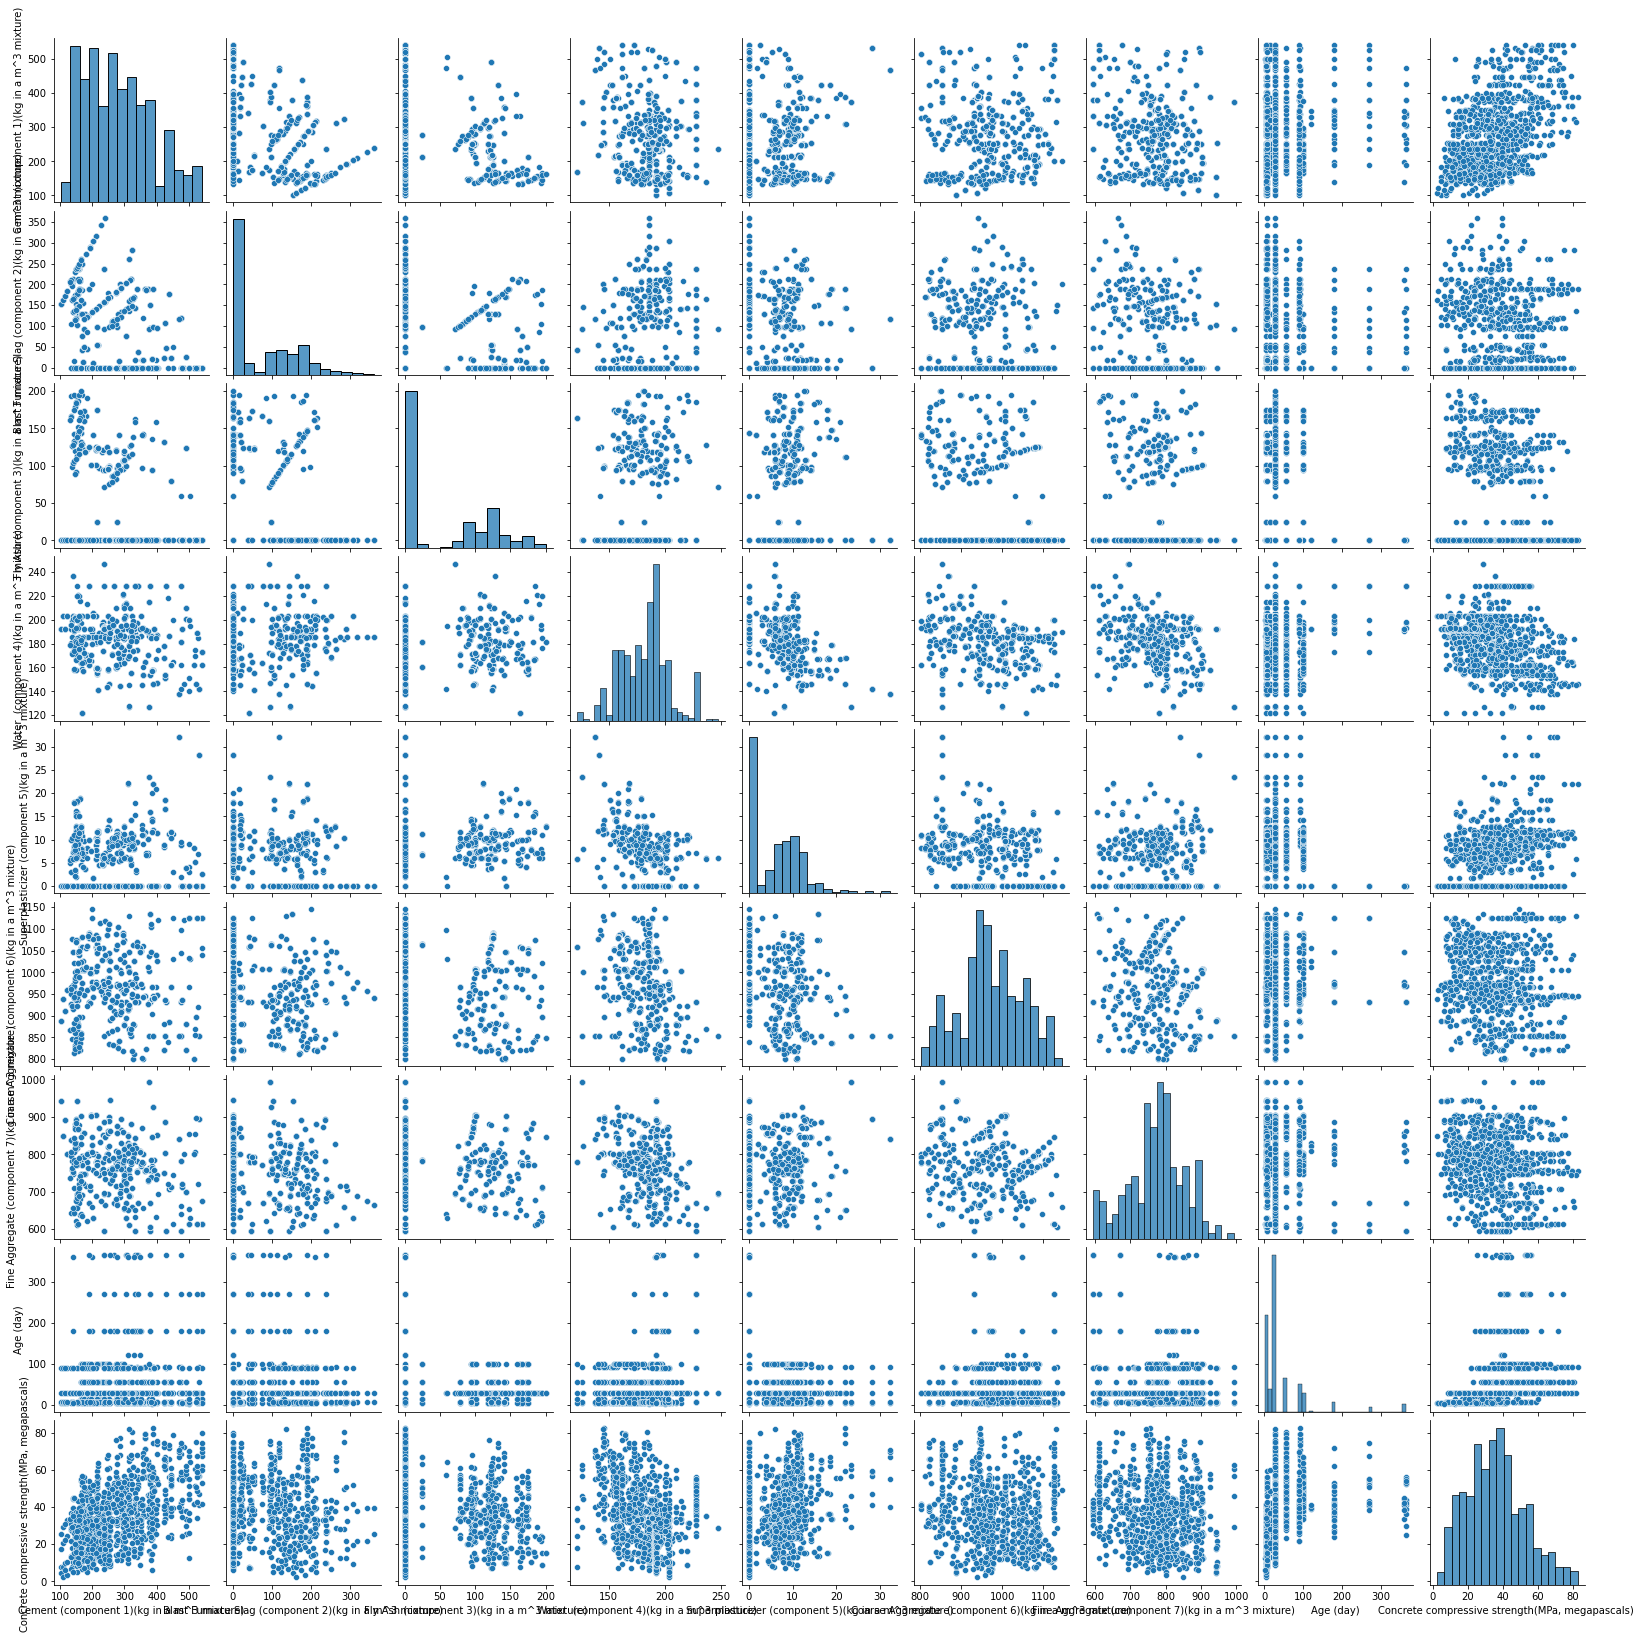

In [5]:
sns.pairplot(data)

Text(0.5, 1.0, 'Percent missing data by feature')

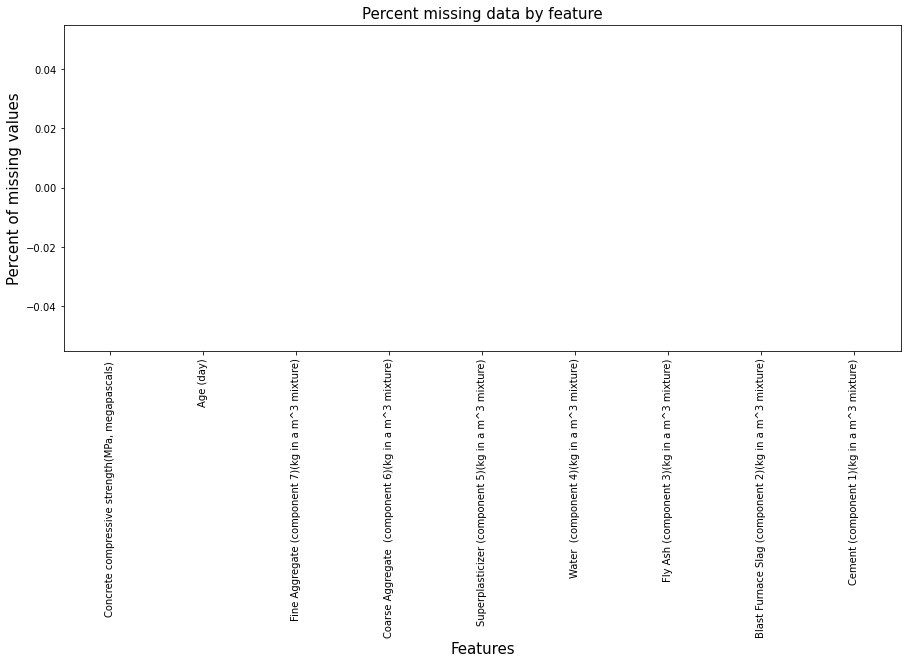

In [4]:
#Calculating percentage of missing data points corresponding to each feature
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [6]:
# Renaming the name of feature
cement = data['Cement (component 1)(kg in a m^3 mixture)']
blast = data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']
flyash = data['Fly Ash (component 3)(kg in a m^3 mixture)']
water = data['Water  (component 4)(kg in a m^3 mixture)']
plast = data['Superplasticizer (component 5)(kg in a m^3 mixture)']
coarse = data['Coarse Aggregate  (component 6)(kg in a m^3 mixture)']
fine = data['Fine Aggregate (component 7)(kg in a m^3 mixture)']
age = data['Age (day)']
strength = data['Concrete compressive strength(MPa, megapascals) ']

In [7]:
# Classifying the strrngth into 4 classes
strength_class = []
for i in range(len(strength)):
    if 0<strength[i]<=21:
        strength_class.append(1)
    elif 21<strength[i]<=43:
        strength_class.append(2)
    elif 43<strength[i]<=64:
        strength_class.append(3)
    else:
        strength_class.append(4)
        
strength_class_new = pd.DataFrame(strength_class, columns = ['strength_class'])
strength_class_df = strength_class_new['strength_class']

In [8]:
#Randomly assigning values with 'NA'for 10% data for each atributes in the data frame. 
## i.e., careating 10% field with missing value
r=[]
for i in range(8):
    r.append(random.sample(range(len(cement)), int(0.1*len(cement))))
    print(r)

[[2, 681, 121, 973, 200, 602, 529, 421, 110, 687, 261, 42, 316, 444, 322, 895, 631, 666, 593, 504, 691, 661, 737, 921, 768, 229, 109, 930, 167, 13, 960, 934, 236, 375, 85, 116, 952, 645, 794, 379, 811, 534, 907, 19, 106, 799, 450, 626, 947, 611, 756, 152, 812, 34, 73, 214, 146, 447, 165, 603, 512, 608, 470, 451, 475, 985, 617, 694, 253, 591, 343, 1012, 1013, 553, 275, 635, 164, 349, 557, 548, 310, 739, 506, 598, 956, 218, 751, 638, 328, 462, 88, 558, 84, 401, 221, 80, 556, 166, 140, 998, 552, 169, 787]]
[[2, 681, 121, 973, 200, 602, 529, 421, 110, 687, 261, 42, 316, 444, 322, 895, 631, 666, 593, 504, 691, 661, 737, 921, 768, 229, 109, 930, 167, 13, 960, 934, 236, 375, 85, 116, 952, 645, 794, 379, 811, 534, 907, 19, 106, 799, 450, 626, 947, 611, 756, 152, 812, 34, 73, 214, 146, 447, 165, 603, 512, 608, 470, 451, 475, 985, 617, 694, 253, 591, 343, 1012, 1013, 553, 275, 635, 164, 349, 557, 548, 310, 739, 506, 598, 956, 218, 751, 638, 328, 462, 88, 558, 84, 401, 221, 80, 556, 166, 140, 998

In [9]:
for i in range(len(r[0])):
    cement[r[0][i]] = 'NA'

for i in range(len(r[1])):
    blast[r[1][i]] = 'NA'
    
for i in range(len(r[2])):
    flyash[r[2][i]] = 'NA'

for i in range(len(r[3])):
    water[r[3][i]] = 'NA'

for i in range(len(r[4])):
    plast[r[4][i]] = 'NA'

for i in range(len(r[5])):
    coarse[r[5][i]] = 'NA'
    
for i in range(len(r[6])):
    fine[r[6][i]] = 'NA'
    
for i in range(len(r[7])):
    age[r[7][i]] = 'NA'

<ipython-input-9-0a350639b1f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cement[r[0][i]] = 'NA'
C:\Users\cs\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-9-0a350639b1f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blast[r[1][i]] = 'NA'
<ipython-input-9-0a350639b1f3>:8: SettingWithCopyWarning: 
A value is trying

In [10]:
new_Concrete_Data = pd.concat([cement,blast,flyash,water,plast,coarse,fine,age,strength_class_df],axis=1)
new_Concrete = pd.DataFrame(new_Concrete_Data)

In [11]:
#Storing original data with categorised strength into new dataframe 
new_Concrete_Data.to_excel('New_Data.xls')